In [589]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer

# import the train test split
from sklearn.model_selection import train_test_split

In [590]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week7


In [591]:
price_file = 'IL_Corn_Price_1986_2016.csv'
price_df = pd.read_csv(price_file)


input_data = pd.read_csv('input_model_weighted_average.csv')
input_data.columns = map(str.upper, input_data.columns)

# drop UNNAMED:0.1
input_data = input_data.drop('UNNAMED: 0', axis=1)

input_data.head()

,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,HUM_AVG,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
0,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,75.092035,...,18.199743,9.979591,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000
1,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,82.286915,...,16.507919,6.647287,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457
2,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,65.295138,...,18.111402,10.209948,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313
3,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,58.069374,...,19.391184,11.580387,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521
4,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,62.031159,...,19.073952,9.481744,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441


In [592]:
grouped_data = input_data.groupby(["YEAR"])
year_names = input_data["YEAR"].drop_duplicates().reset_index(drop=True)
year_names = year_names[year_names != 2000] # Our database has incomplete data for 2000

month_names = grouped_data.get_group(1986)["MONTH"]
month_names
weather_factors = input_data.columns[2:]
colnames = []

for mon_name in month_names:
    for factors in weather_factors:
        colnames.append(mon_name + "_" + factors)

annual_weather_input = pd.DataFrame(0, index = year_names, columns = colnames)

In [593]:
for year in year_names:
    temp_df = grouped_data.get_group(year)
    temp_list = []
    for mon_name in month_names:
        temp_list.extend(temp_df.loc[temp_df["MONTH"] == mon_name].iloc[0,2:])
    annual_weather_input.loc[year] = temp_list

In [594]:
temp_list

[56.208956699263105,
 28.210966908155012,
 1.8269073488677965,
 47.001875040320655,
 20.913060655064346,
 -8.8311724933041713,
 99.346199869725226,
 74.066579136591159,
 38.988302328920774,
 30.494711761976014,
 29.994242994184745,
 29.350997246749891,
 10.15259415262121,
 8.8438953578334019,
 0.059393619035925452,
 32.207612330731308,
 9.7781991637796661,
 1.2329440422206637,
 4.7998191553786205,
 8.511348052018322,
 2.4592319202202604,
 0.015259415262120647,
 66.900172312251428,
 33.807152508476591,
 6.3317052461588714,
 50.693124990895349,
 23.887684661398353,
 -6.1098053579121077,
 99.734310324375727,
 69.674338420202105,
 26.245278581878495,
 30.588809380612375,
 29.982752114132513,
 29.383167070046593,
 10.15259415262121,
 8.6546144728651146,
 0.061922114029921566,
 36.206539541291463,
 9.8244657204320127,
 0.83632979066558744,
 4.2247894481637722,
 6.8145302097922453,
 3.2992999294518683,
 0.56580018022030165,
 71.53824582798326,
 44.964953542219533,
 14.037543468262706,
 57.680

In [595]:
annual_price_input = pd.DataFrame(0, index = year_names, columns = month_names)
annual_price_discounted_input = pd.DataFrame(0, index = year_names, columns = month_names)

grouped_price = price_df.groupby(["Year"])
month_names[3] = "APR"
for year in year_names:
    temp_df = grouped_price.get_group(year)
    temp_list_1 = []
    temp_list_2 = []
    for mon_name in month_names:
        temp_list_1.append(temp_df[temp_df["Period"] == mon_name]["Value"].iloc[0])
        temp_list_2.append(temp_df[temp_df["Period"] == mon_name]["Discounted_Value"].iloc[0])
    
    annual_price_input.loc[year] = temp_list_1
    annual_price_discounted_input.loc[year] = temp_list_2

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [596]:
annual_price_input.to_csv("annual_price_input.csv")
annual_price_discounted_input.to_csv("annual_price_discounted_input.csv")
annual_weather_input.to_csv("annual_weather_input.csv")

In [597]:
annual_weather_input

,JAN_TMP_HIGH,JAN_TMP_AVG,JAN_TMP_LOW,JAN_DP_HIGH,JAN_DP_AVG,JAN_DP_LOW,JAN_HUM_HIGH,JAN_HUM_AVG,JAN_HUM_LOW,JAN_SEALVL_HIGH,...,DEC_VIS_HIGH,DEC_VIS_AVG,DEC_VIS_LOW,DEC_WIND_HIGH,DEC_WIND_AVG,DEC_PRECIP,DEC_NUMDAY_RAIN,DEC_NUM_DAYS_SNOW,DEC_NUM_DAYS_FOG,DEC_NUM_DAYS_THNDRSTRM
YEAR,,,,,,,,,,,,,,,,,,,,,
1986,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,75.092035,32.839506,30.674052,...,18.276040,8.111151,0.171012,30.035203,9.005973,13.063238,4.954492,6.141817,16.710648,0.000000
1987,51.603404,27.391903,-0.148039,38.817646,20.733436,-8.513812,98.946455,76.677755,34.704932,30.415186,...,19.391184,9.598138,0.000000,38.844028,11.646561,6.928783,9.977321,8.323399,14.877116,1.181361
1988,56.407002,25.686117,-0.995032,46.273711,17.866325,-7.806793,99.867597,73.854349,34.931524,30.699720,...,19.391184,11.411940,0.000000,29.942347,11.087768,1.484312,4.681702,6.724860,7.015422,0.394821
1989,64.166278,30.670111,5.880811,48.648697,22.362794,-1.682774,100.000000,73.753432,32.277209,30.704138,...,19.391184,10.324949,0.000000,35.840153,9.254137,13.640465,1.860475,11.521330,8.494498,0.000000
1990,67.529677,44.554956,25.075437,49.709007,25.711125,4.956941,89.797538,67.230550,27.670203,30.440353,...,18.300289,9.936429,0.123844,30.633513,10.271417,2.056510,6.864935,6.986234,12.641199,0.388022
1991,43.368253,25.461370,3.588280,36.134011,20.209888,-5.211373,99.127284,80.597620,38.417212,30.626277,...,18.300289,9.373647,0.000000,29.951122,9.403403,1.191461,5.039728,3.175232,15.066190,0.415485
1992,50.047979,30.675812,1.109954,40.819080,24.167717,-6.139658,99.814234,78.754114,38.068572,30.498681,...,18.300289,9.001303,0.061922,33.597474,9.667981,2.009294,5.907737,7.617746,11.544263,0.061922
1993,53.403603,29.051889,6.435890,48.924759,23.198574,0.352510,100.000000,79.210183,31.109257,30.658311,...,17.860550,10.103579,0.000000,28.076645,9.601381,1.076924,6.929617,7.942701,12.874551,0.000000
1994,47.582543,19.810711,-16.381349,42.600942,13.476157,-23.794517,99.814234,77.178969,41.022925,30.686980,...,17.749182,8.544477,0.109089,26.646452,8.361590,0.864822,6.241177,5.005449,18.373923,0.270226


In [598]:
annual_price_input

MONTH,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1986,2.35,2.38,2.35,2.34,2.45,2.45,2.04,1.77,1.52,1.39,1.47,1.54
1987,1.53,1.45,1.51,1.56,1.72,1.75,1.66,1.53,1.53,1.60,1.68,1.80
1988,1.81,1.90,1.91,1.94,2.03,2.51,2.77,2.68,2.63,2.57,2.55,2.53
1989,2.62,2.68,2.67,2.63,2.68,2.58,2.56,2.31,2.34,2.25,2.28,2.33
1990,2.31,2.34,2.44,2.61,2.71,2.74,2.71,2.55,2.37,2.26,2.22,2.29
1991,2.33,2.39,2.47,2.52,2.48,2.40,2.37,2.48,2.39,2.42,2.38,2.44
1992,2.48,2.58,2.63,2.56,2.55,2.53,2.35,2.20,2.16,2.00,2.01,2.06
1993,2.08,2.05,2.15,2.22,2.21,2.11,2.23,2.26,2.23,2.31,2.44,2.69
1994,2.71,2.86,2.82,2.75,2.67,2.71,2.31,2.17,2.18,2.03,2.00,2.17


In [599]:
annual_price_discounted_input

MONTH,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1986,2.350000,2.379410,2.348835,2.338259,2.447570,2.446963,2.036966,1.766930,1.516987,1.386901,1.466358,1.535804
1987,1.525453,1.445332,1.504766,1.554207,1.713188,1.742637,1.652605,1.522807,1.522429,1.591688,1.670858,1.789761
1988,1.799257,1.888255,1.897722,1.927051,2.015951,2.492010,2.749465,2.659472,2.609208,2.549050,2.528586,2.508132
1989,2.596710,2.655517,2.644953,2.604682,2.653542,2.553896,2.533470,2.285494,2.314601,2.225026,2.254134,2.302996
1990,2.282661,2.311733,2.409927,2.577192,2.675272,2.704216,2.673945,2.515449,2.337309,2.228273,2.188292,2.256732
1991,2.295582,2.354111,2.432307,2.480928,2.440943,2.361617,2.331518,2.439127,2.350028,2.378936,2.339034,2.397407
1992,2.436104,2.533706,2.582168,2.512818,2.502381,2.482139,2.304972,2.157311,2.117562,1.960220,1.969532,2.018025
1993,2.037112,2.007233,2.104624,2.172608,2.162285,2.063932,2.180771,2.209561,2.179690,2.257325,2.383769,2.627356
1994,2.646234,2.792012,2.752280,2.683295,2.604590,2.642954,2.252291,2.115264,2.124485,1.977814,1.948102,2.113167


In [600]:
df_oct_updated = pd.read_csv('annual_weather_input_Sid.csv')
df_oct_updated.head()

,YEAR,ARP_TMP_HIGH,ARP_TMP_AVG,ARP_TMP_LOW,ARP_DP_HIGH,ARP_DP_AVG,ARP_DP_LOW,ARP_HUM_HIGH,ARP_HUM_AVG,ARP_HUM_LOW,...,SEP_VIS_HIGH,SEP_VIS_AVG,SEP_VIS_LOW,SEP_WIND_HIGH,SEP_WIND_AVG,SEP_PRECIP,SEP_NUMDAY_RAIN,SEP_NUM_DAYS_SNOW,SEP_NUM_DAYS_FOG,SEP_NUM_DAYS_THNDRSTRM
0,1986,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,58.069374,18.204688,...,18.770850,10.109719,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013
1,1987,85.305443,51.656418,21.970248,53.181639,35.382062,12.721515,98.923711,57.038358,16.507981,...,19.238590,10.445700,0.204506,25.124887,7.115135,5.524179,7.851274,0.000000,12.212706,2.418011
2,1988,80.916532,49.536814,24.445530,55.833496,33.898013,11.252577,98.650757,57.738017,20.443700,...,19.238590,10.452191,0.274825,30.066426,7.966769,1.215616,6.366562,0.109089,10.957637,2.242997
3,1989,82.188160,50.088594,23.307634,60.465318,37.334599,15.095494,99.196568,64.128090,22.257809,...,19.391184,10.864624,0.259979,26.937215,6.818782,4.533883,7.510475,0.000000,13.843408,2.083988
4,1990,82.228676,49.924743,21.476173,57.847267,38.162492,12.174805,99.806560,67.249602,22.315227,...,18.300289,10.130970,0.032928,23.828228,6.281056,8.864093,6.433020,0.000000,14.698194,2.406032


In [601]:
price_updated = pd.read_csv('annual_price_input_Sid.csv')
price_updated.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1986,2.35,2.38,2.35,2.34,2.45,2.45,2.04,1.77,1.52,1.39,1.47,1.54
1,1987,1.53,1.45,1.51,1.56,1.72,1.75,1.66,1.53,1.53,1.60,1.68,1.80
2,1988,1.81,1.90,1.91,1.94,2.03,2.51,2.77,2.68,2.63,2.57,2.55,2.53
3,1989,2.62,2.68,2.67,2.63,2.68,2.58,2.56,2.31,2.34,2.25,2.28,2.33
4,1990,2.31,2.34,2.44,2.61,2.71,2.74,2.71,2.55,2.37,2.26,2.22,2.29


In [602]:
df_oct_updated['OCT_PRICE'] = price_updated['OCT']
df_oct_updated

,YEAR,ARP_TMP_HIGH,ARP_TMP_AVG,ARP_TMP_LOW,ARP_DP_HIGH,ARP_DP_AVG,ARP_DP_LOW,ARP_HUM_HIGH,ARP_HUM_AVG,ARP_HUM_LOW,...,SEP_VIS_AVG,SEP_VIS_LOW,SEP_WIND_HIGH,SEP_WIND_AVG,SEP_PRECIP,SEP_NUMDAY_RAIN,SEP_NUM_DAYS_SNOW,SEP_NUM_DAYS_FOG,SEP_NUM_DAYS_THNDRSTRM,OCT_PRICE
0,1986,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,58.069374,18.204688,...,10.109719,0.061922,31.473925,7.953490,6.651649e+00,12.019534,0.109089,13.926898,5.663013,1.39
1,1987,85.305443,51.656418,21.970248,53.181639,35.382062,12.721515,98.923711,57.038358,16.507981,...,10.445700,0.204506,25.124887,7.115135,5.524179e+00,7.851274,0.000000,12.212706,2.418011,1.60
2,1988,80.916532,49.536814,24.445530,55.833496,33.898013,11.252577,98.650757,57.738017,20.443700,...,10.452191,0.274825,30.066426,7.966769,1.215616e+00,6.366562,0.109089,10.957637,2.242997,2.57
3,1989,82.188160,50.088594,23.307634,60.465318,37.334599,15.095494,99.196568,64.128090,22.257809,...,10.864624,0.259979,26.937215,6.818782,4.533883e+00,7.510475,0.000000,13.843408,2.083988,2.25
4,1990,82.228676,49.924743,21.476173,57.847267,38.162492,12.174805,99.806560,67.249602,22.315227,...,10.130970,0.032928,23.828228,6.281056,8.864093e+00,6.433020,0.000000,14.698194,2.406032,2.26
5,1991,78.605055,53.820404,31.381112,57.150581,40.051796,18.630522,96.689898,62.528382,22.394981,...,12.136193,0.729930,23.534336,7.310304,1.997983e+01,7.306921,0.000000,9.310759,3.023259,2.42
6,1992,75.811774,49.032761,24.482117,57.732105,37.437558,12.885487,98.427299,67.018538,23.162976,...,11.524455,0.185989,25.025825,7.472970,4.791413e+00,8.235159,0.000000,8.678525,3.914363,2.00
7,1993,72.000800,48.309567,26.817901,55.743052,37.387852,17.228440,97.272763,67.318414,25.186520,...,11.183451,0.032928,25.705415,7.448685,1.207558e+06,10.412909,0.000000,12.588284,3.433638,2.31
8,1994,80.398773,50.705829,20.431745,62.095669,36.414045,11.063032,98.853867,61.438452,18.162264,...,10.792766,0.215146,22.220465,5.983394,1.336416e+00,6.430989,0.000000,12.243748,1.401867,2.03
9,1995,74.787548,48.608425,21.713625,58.307763,36.391915,3.980988,97.352343,65.146269,23.763698,...,11.493086,0.945983,25.394772,7.050352,3.987369e+00,5.526442,0.000000,10.115152,1.008864,2.86


In [603]:
# List of column names

#List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
df_oct_updated.columns = map(str.upper, df_oct_updated.columns)

# rename UNNAMED:0 to INDEX
#input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
#input_data = input_data.drop('INDEX', axis=1)

df_oct_updated.head()


,YEAR,ARP_TMP_HIGH,ARP_TMP_AVG,ARP_TMP_LOW,ARP_DP_HIGH,ARP_DP_AVG,ARP_DP_LOW,ARP_HUM_HIGH,ARP_HUM_AVG,ARP_HUM_LOW,...,SEP_VIS_AVG,SEP_VIS_LOW,SEP_WIND_HIGH,SEP_WIND_AVG,SEP_PRECIP,SEP_NUMDAY_RAIN,SEP_NUM_DAYS_SNOW,SEP_NUM_DAYS_FOG,SEP_NUM_DAYS_THNDRSTRM,OCT_PRICE
0,1986,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,58.069374,18.204688,...,10.109719,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.39
1,1987,85.305443,51.656418,21.970248,53.181639,35.382062,12.721515,98.923711,57.038358,16.507981,...,10.445700,0.204506,25.124887,7.115135,5.524179,7.851274,0.000000,12.212706,2.418011,1.60
2,1988,80.916532,49.536814,24.445530,55.833496,33.898013,11.252577,98.650757,57.738017,20.443700,...,10.452191,0.274825,30.066426,7.966769,1.215616,6.366562,0.109089,10.957637,2.242997,2.57
3,1989,82.188160,50.088594,23.307634,60.465318,37.334599,15.095494,99.196568,64.128090,22.257809,...,10.864624,0.259979,26.937215,6.818782,4.533883,7.510475,0.000000,13.843408,2.083988,2.25
4,1990,82.228676,49.924743,21.476173,57.847267,38.162492,12.174805,99.806560,67.249602,22.315227,...,10.130970,0.032928,23.828228,6.281056,8.864093,6.433020,0.000000,14.698194,2.406032,2.26


In [604]:
col_names = list(df_oct_updated)

# List all column types
#input_data.dtypes
print("Shape of Original data: {}".format(df_oct_updated.shape) + "\n")

input_variables = df_oct_updated.iloc[:,67:134]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

price = df_oct_updated.iloc[:,-1]

Shape of Original data: (30, 134)

Variables: Index(['JUL_TMP_HIGH', 'JUL_TMP_AVG', 'JUL_TMP_LOW', 'JUL_DP_HIGH',
       'JUL_DP_AVG', 'JUL_DP_LOW', 'JUL_HUM_HIGH', 'JUL_HUM_AVG',
       'JUL_HUM_LOW', 'JUL_SEALVL_HIGH', 'JUL_SEALVL_AVG', 'JUL_SEALVL_LOW',
       'JUL_VIS_HIGH', 'JUL_VIS_AVG', 'JUL_VIS_LOW', 'JUL_WIND_HIGH',
       'JUL_WIND_AVG', 'JUL_PRECIP', 'JUL_NUMDAY_RAIN', 'JUL_NUM_DAYS_SNOW',
       'JUL_NUM_DAYS_FOG', 'JUL_NUM_DAYS_THNDRSTRM', 'AUG_TMP_HIGH',
       'AUG_TMP_AVG', 'AUG_TMP_LOW', 'AUG_DP_HIGH', 'AUG_DP_AVG', 'AUG_DP_LOW',
       'AUG_HUM_HIGH', 'AUG_HUM_AVG', 'AUG_HUM_LOW', 'AUG_SEALVL_HIGH',
       'AUG_SEALVL_AVG', 'AUG_SEALVL_LOW', 'AUG_VIS_HIGH', 'AUG_VIS_AVG',
       'AUG_VIS_LOW', 'AUG_WIND_HIGH', 'AUG_WIND_AVG', 'AUG_PRECIP',
       'AUG_NUMDAY_RAIN', 'AUG_NUM_DAYS_SNOW', 'AUG_NUM_DAYS_FOG',
       'AUG_NUM_DAYS_THNDRSTRM', 'SEP_TMP_HIGH', 'SEP_TMP_AVG', 'SEP_TMP_LOW',
       'SEP_DP_HIGH', 'SEP_DP_AVG', 'SEP_DP_LOW', 'SEP_HUM_HIGH',
       'SEP_HUM_AVG'

In [605]:
price

0     1.39
1     1.60
2     2.57
3     2.25
4     2.26
5     2.42
6     2.00
7     2.31
8     2.03
9     2.86
10    2.94
11    2.64
12    1.99
13    1.77
14    1.85
15    2.36
16    2.13
17    2.22
18    1.83
19    2.62
20    3.31
21    4.29
22    3.59
23    4.51
24    5.84
25    6.84
26    4.49
27    3.58
28    3.70
29    3.30
Name: OCT_PRICE, dtype: float64

In [606]:
input_variables.iloc[:,0:-1]

,JUL_TMP_HIGH,JUL_TMP_AVG,JUL_TMP_LOW,JUL_DP_HIGH,JUL_DP_AVG,JUL_DP_LOW,JUL_HUM_HIGH,JUL_HUM_AVG,JUL_HUM_LOW,JUL_SEALVL_HIGH,...,SEP_VIS_HIGH,SEP_VIS_AVG,SEP_VIS_LOW,SEP_WIND_HIGH,SEP_WIND_AVG,SEP_PRECIP,SEP_NUMDAY_RAIN,SEP_NUM_DAYS_SNOW,SEP_NUM_DAYS_FOG,SEP_NUM_DAYS_THNDRSTRM
0,93.651100,75.325134,57.224505,71.740380,60.440694,41.882198,91.024753,65.247136,24.452377,30.263593,...,18.770850,10.109719,0.061922,31.473925,7.953490,6.651649e+00,12.019534,0.109089,13.926898,5.663013
1,94.486551,74.924089,52.515406,69.564460,60.019149,44.308975,91.503566,65.152632,31.710453,30.244792,...,19.238590,10.445700,0.204506,25.124887,7.115135,5.524179e+00,7.851274,0.000000,12.212706,2.418011
2,98.285800,76.147004,52.601097,72.839880,57.239873,37.860047,95.431234,56.902112,18.966772,30.238511,...,19.238590,10.452191,0.274825,30.066426,7.966769,1.215616e+00,6.366562,0.109089,10.957637,2.242997
3,95.761255,73.614924,54.758025,72.971333,57.004810,37.369590,97.154767,61.526026,21.666425,30.297136,...,19.391184,10.864624,0.259979,26.937215,6.818782,4.533883e+00,7.510475,0.000000,13.843408,2.083988
4,94.596711,72.809317,54.355001,69.617436,57.846119,39.331353,90.804255,63.600169,27.954080,30.225818,...,18.300289,10.130970,0.032928,23.828228,6.281056,8.864093e+00,6.433020,0.000000,14.698194,2.406032
5,92.824178,73.060555,50.272724,69.896376,57.406039,36.409803,90.177673,61.855857,25.086188,30.267428,...,18.300289,12.136193,0.729930,23.534336,7.310304,1.997983e+01,7.306921,0.000000,9.310759,3.023259
6,88.958402,70.634002,54.320190,74.285367,61.053674,42.234909,98.486009,74.184219,30.526323,30.207381,...,18.300289,11.524455,0.185989,25.025825,7.472970,4.791413e+00,8.235159,0.000000,8.678525,3.914363
7,91.221532,73.749543,57.418969,74.958560,64.109818,48.184068,96.831362,73.278828,35.907527,30.200500,...,18.300289,11.183451,0.032928,25.705415,7.448685,1.207558e+06,10.412909,0.000000,12.588284,3.433638
8,90.281359,71.570523,52.781149,74.823360,61.745389,41.249351,98.368663,71.659229,30.136026,30.215017,...,18.300289,10.792766,0.215146,22.220465,5.983394,1.336416e+00,6.430989,0.000000,12.243748,1.401867
9,96.906720,74.300815,51.539695,77.009134,61.967612,37.776534,98.632329,66.618852,23.439871,30.180513,...,15.782855,11.493086,0.945983,25.394772,7.050352,3.987369e+00,5.526442,0.000000,10.115152,1.008864


In [624]:
# Splitting Data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:-1], price, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# Applying PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 3)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)


(24, 66) (24,)
(6, 66) (6,)


# Simple Linear Regression

In [608]:
# regression libraries
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_{}: ".format(lr.coef_))
print("\n" + "lr_intercept_{}".format(lr.intercept_))

lr.coef_[  1.74900820e-02   3.72961724e-02   1.08027826e-02   1.23103493e-01
   7.68536255e-02   6.50330638e-02  -4.28564224e-02  -6.80463327e-02
  -6.96841077e-03  -1.37463569e-02  -5.79420228e-03  -7.22803330e-03
  -1.04673308e-02   9.73277995e-02  -2.51205811e-03   6.70372366e-02
  -2.13548765e-02   4.68390650e-03  -1.75207917e-02   5.55111512e-17
  -1.41034922e-02   4.33185712e-02  -3.26749574e-02   1.67123168e-02
  -8.00853015e-04  -1.35233490e-02   7.58488671e-03  -7.52584854e-02
   6.78099577e-02  -8.10012230e-02   3.95480240e-02  -4.20181527e-03
  -1.94847649e-03  -6.08436489e-04  -4.91390075e-02   8.83560926e-02
   1.38928527e-02   1.84869977e-01  -5.80689359e-02  -1.62474840e-02
  -1.14338282e-01   0.00000000e+00   6.59839128e-02  -9.98241438e-02
   1.58790526e-01  -1.08321872e-01  -1.12152670e-01   1.90863676e-01
  -7.40080922e-02   4.70921066e-02   9.69954441e-02  -4.19041354e-02
  -3.41125343e-02   1.50048208e-03   4.11112652e-04   1.22442454e-03
  -6.29367187e-02   1.2320

In [609]:
# Train and Test Performance
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test,y_test)))

# Store Result and Model Name
model_results.append(lr.score(X_test,y_test))
model_name.append("Linear")

Training set score: 1.000000
Test set score: -1.745825


# Ridge Regression

In [610]:
# Coefficients should be close to zero

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge.score(X_test,y_test))
model_name.append("Ridge")

Training set score: 1.00
Test set score: -1.49


In [611]:
# Try with some handpicked alpha values
# Note: Higher alpha decerease training test performance but increases generalization

ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_train, y_train)))
print("Test_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_test, y_test)))
print("\n")

# Store Result and Model Name
model_results.append(ridge_01.score(X_test,y_test))
model_name.append("Ridge_0.1")

ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training_ridge_10 set score: {:.2f}".format(ridge_10.score(X_train, y_train)))
print("Test_ridge_10 set score: {:.2f}".format(ridge_10.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge_10.score(X_test,y_test))
model_name.append("Ridge_10")

Training_ridge_0.1 set score: 1.00
Test_ridge_0.1 set score: -1.72


Training_ridge_10 set score: 0.99
Test_ridge_10 set score: -0.45


# Lasso Regression

In [612]:
# we have large number of features and only a few of them looked important
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso.score(X_test,y_test))
model_name.append("Lasso")

Training set score: 0.47
Test set score: -0.25
Number of features used: 9


In [613]:
# Setting alpha too low will remove the effect of regularization

lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso0001.score(X_test,y_test))
model_name.append("Lasso_0.001")

Training set score: 1.00
Test set score: -5.92
Number of features used: 26


//anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Elastic Net

In [614]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.7,max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(enet.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(enet.coef_ != 0)))

# Store Result and Model Name
model_results.append(enet.score(X_test,y_test))
model_name.append("Elastic Net")

Training set score: 0.97
Test set score: -1.16
Number of features used: 23


In [615]:
# # Fitting Multiple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)

# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)
# print("Accuracy: %f"%r2_score(y_test,y_pred))

# # Store Result and Model Name
# model_results.append(r2_score(y_test,y_pred))
# model_name.append("MLR")

# Decision Tree

In [616]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Decision Tree: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("DT")

Accuracy of Decision Tree: -4.866385


# Random Forest

In [625]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_10: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_10")

Accuracy of Random Forest_10: 0.231876


In [626]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_100: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_100")

Accuracy of Random Forest_100: 0.255308


In [627]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forrest_300: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_300")

Accuracy of Random Forrest_300: 0.304736


In [620]:
model_name

['Linear',
 'Ridge',
 'Ridge_0.1',
 'Ridge_10',
 'Lasso',
 'Lasso_0.001',
 'Elastic Net',
 'DT',
 'RF_10',
 'RF_100',
 'RF_300']

# Plot Results of Regression Models

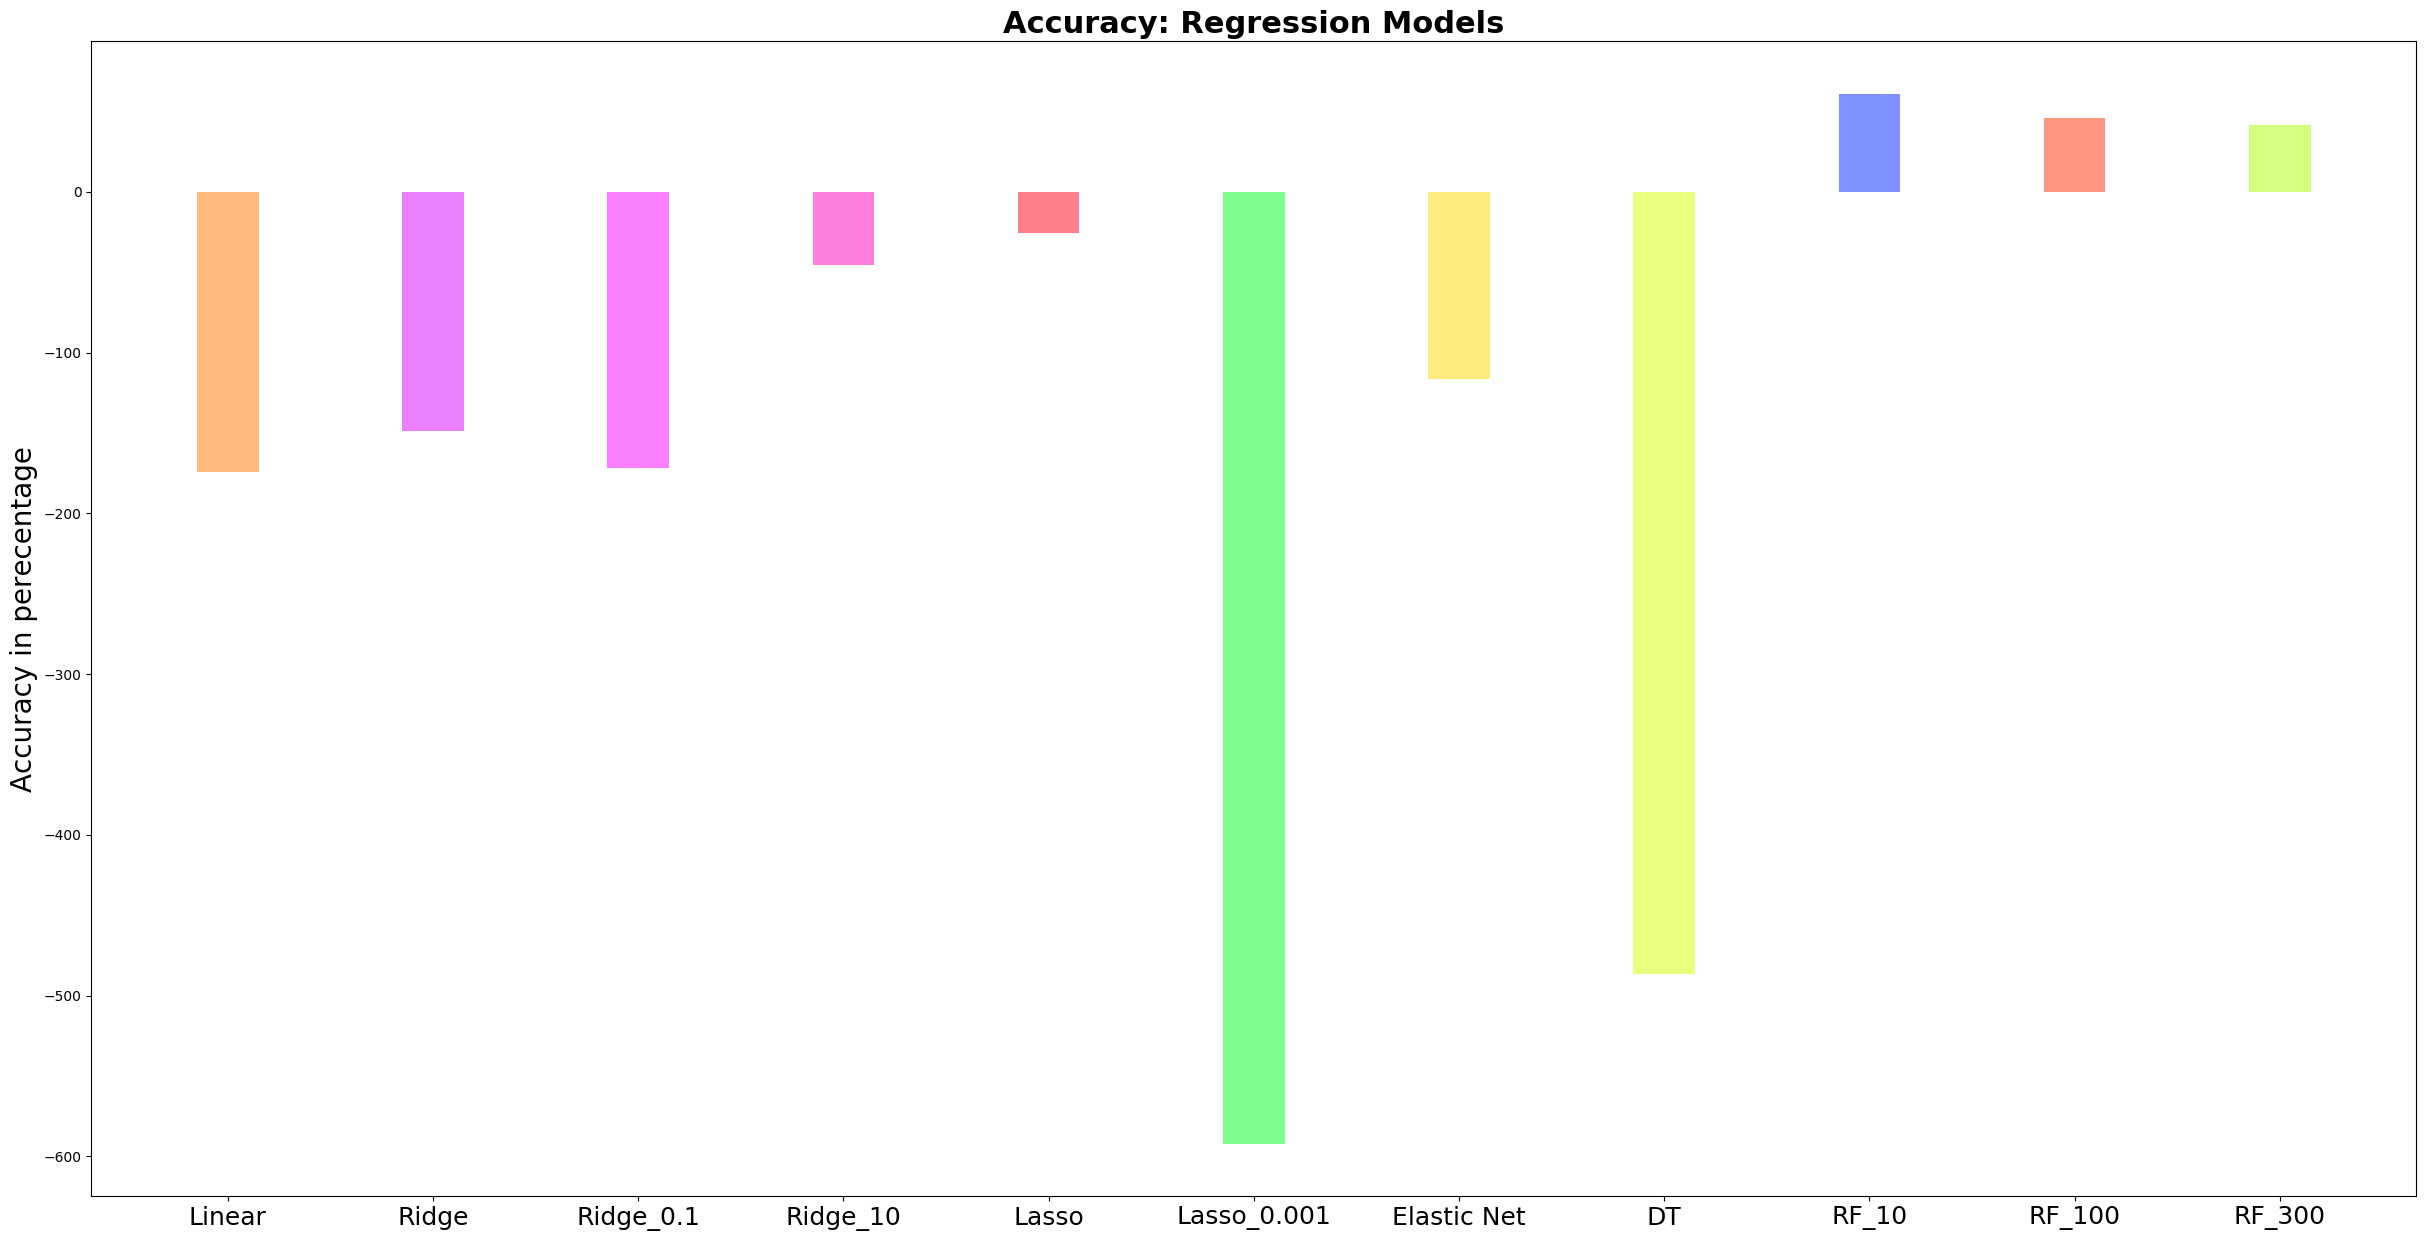

In [621]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.3, color = colors)
plt.xticks(y_pos, model_name, fontsize = 18)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Regression Models', fontsize=22, fontweight='bold')
plt.show()